In [24]:
import pandas as pd
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,accuracy_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


In [2]:
df_weekly = pd.read_csv('../data/processed/merged_weekly.csv')


In [25]:
features = ['weighted_sentiment_score']

df_weekly['target_return'] = df_weekly['price_return'].shift(-1)
df = df_weekly.dropna(subset=features + ['target_return'])

split_idx = int(0.8 * len(df))
X_train, X_test = df[features].iloc[:split_idx], df[features].iloc[split_idx:]
y_train, y_test = df['target_return'].iloc[:split_idx], df['target_return'].iloc[split_idx:]



In [9]:
reg = LinearRegression()
reg.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [10]:
y_pred = reg.predict(X_test)

In [11]:
print(f'R^2: {r2_score(y_test, y_pred):.3f}')
print(f'MSE: {mean_squared_error(y_test, y_pred):.5f}')
print(f'MAE: {mean_absolute_error(y_test, y_pred):.5f}')

R^2: -0.158
MSE: 0.01186
MAE: 0.08118


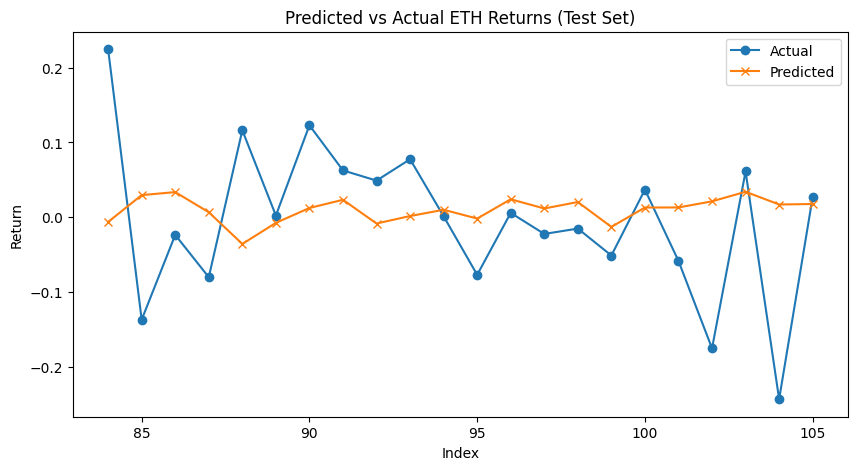

In [13]:
plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label='Actual', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted', marker='x')
plt.title('Predicted vs Actual ETH Returns (Test Set)')
plt.xlabel('Index')
plt.ylabel('Return')
plt.legend()
plt.show()

In [15]:
df_weekly['target_direction'] = (df_weekly['price_return'].shift(-1) > 0).astype(int)
df_clf = df_weekly.dropna(subset=['weighted_sentiment_score', 'target_direction'])

split_idx = int(0.8 * len(df_clf))
X_train, X_test = df_clf[['weighted_sentiment_score']].iloc[:split_idx], df_clf[['weighted_sentiment_score']].iloc[split_idx:]
y_train, y_test = df_clf['target_direction'].iloc[:split_idx], df_clf['target_direction'].iloc[split_idx:]

In [18]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [19]:
y_pred = clf.predict(X_test)

In [22]:
print(f'Accuracy: {accuracy_score(y_test, y_pred):.3f}')
print(f'F1 Score: {f1_score(y_test, y_pred):.3f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.500
F1 Score: 0.667
Confusion Matrix:
[[ 0 11]
 [ 0 11]]


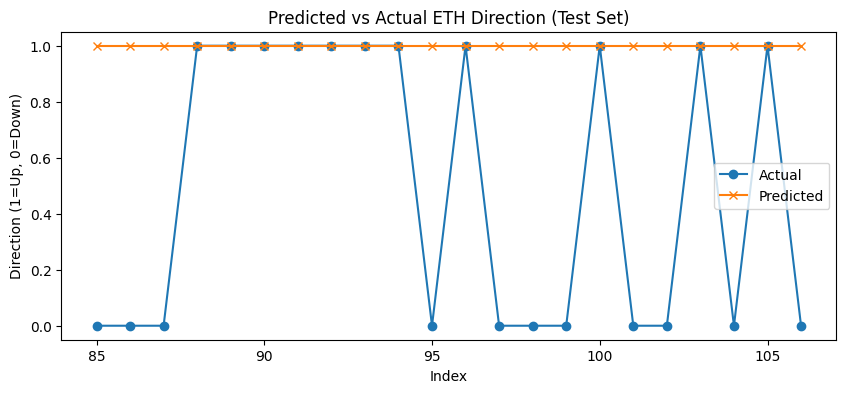

In [23]:
plt.figure(figsize=(10,4))
plt.plot(y_test.index, y_test, label='Actual', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted', marker='x')
plt.title('Predicted vs Actual ETH Direction (Test Set)')
plt.xlabel('Index')
plt.ylabel('Direction (1=Up, 0=Down)')
plt.legend()
plt.show()

In [26]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [27]:
print(f'R^2: {r2_score(y_test, y_pred_rf):.3f}')
print(f'MSE: {mean_squared_error(y_test, y_pred_rf):.5f}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_rf):.5f}')

R^2: -0.780
MSE: 0.01824
MAE: 0.10883


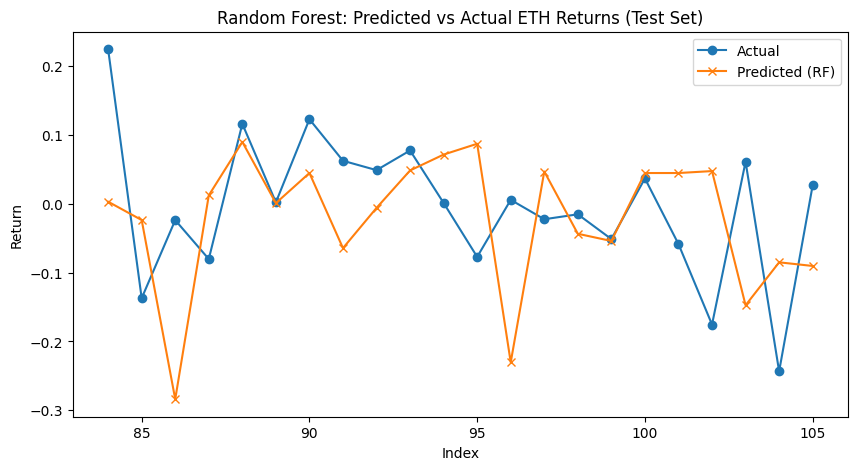

In [28]:
plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label='Actual', marker='o')
plt.plot(y_test.index, y_pred_rf, label='Predicted (RF)', marker='x')
plt.title('Random Forest: Predicted vs Actual ETH Returns (Test Set)')
plt.xlabel('Index')
plt.ylabel('Return')
plt.legend()
plt.show()